In [29]:
using Random
using LinearAlgebra
using Zygote
using Statistics
using Flux
import MLJ
import DataFrames

In [30]:
include("./SVM.jl")
using .svm

In [31]:
X, Y = MLJ.make_blobs(100, 2; centers=2, cluster_std=[1.0, 0.1])
dfBlobs = DataFrames.DataFrame(X)
dfBlobs.y = Y
first(dfBlobs, 5)

Row,x1,x2,y
,Float64,Float64,Cat…
1,6.03686,-2.06534,2
2,6.06697,-2.05187,2
3,-9.78507,1.15098,1
4,6.01253,-2.17838,2
5,5.96916,-1.92322,2


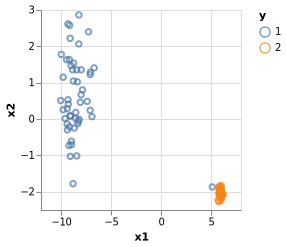

In [32]:
using VegaLite
dfBlobs |> @vlplot(:point, x=:x1, y=:x2, color = :"y:n") 

In [33]:
X = MLJ.Tables.matrix(X)
Y = float(Y)

100-element Vector{Float64}:
 2.0
 2.0
 1.0
 2.0
 2.0
 2.0
 2.0
 1.0
 2.0
 2.0
 2.0
 2.0
 1.0
 ⋮
 1.0
 1.0
 2.0
 1.0
 2.0
 2.0
 2.0
 1.0
 2.0
 1.0
 1.0
 2.0

In [34]:
svm_entity = svm.fit(svm.SVM(), X, Y)

Main.svm.SVM(0.001f0, 150, 0.01f0, Main.svm.linear_kernel, [0.6742719730056729 0.8837253526056797 … 0.29142080690374117 0.5178072510868968], [0.337054910565643], [6.036862517517972 -2.0653391143205946; 6.066968967495714 -2.05186874923293; … ; -9.971571388018706 1.7784617599608032; 5.894459241150128 -2.1235095665716046])

In [35]:
res = svm.predict_score(svm_entity, X)

100×1 Matrix{Float64}:
 -132.864039527628
 -134.64632042731904
  319.55816920095526
 -126.61895291038746
 -136.9650129983245
 -142.82513360020835
 -123.05010347756823
  208.94577031238586
 -132.28419724373055
 -133.50615848670336
 -128.59252385373347
 -135.53017142679255
  385.7221561695223
    ⋮
  258.9190118399927
  232.5112481171041
 -125.95778927707416
  178.91379492812268
 -111.96089923930464
 -127.07038839068154
 -132.47437358665815
  283.876244506109
 -132.40151751813823
  365.2859725911747
  297.1620231851776
 -124.69462810261497

In [36]:
svm.get_accuracy(res, Y)

0.99